In [31]:
import pandas as pd
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [32]:
df = pd.read_csv(r"C:\Users\Kritika\Downloads\MaunaLoaDailyTemps.csv")

In [33]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [35]:
df.tail()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753
1824,12/30/2018,39.0,52.0,46.0,656,1754


<Axes: >

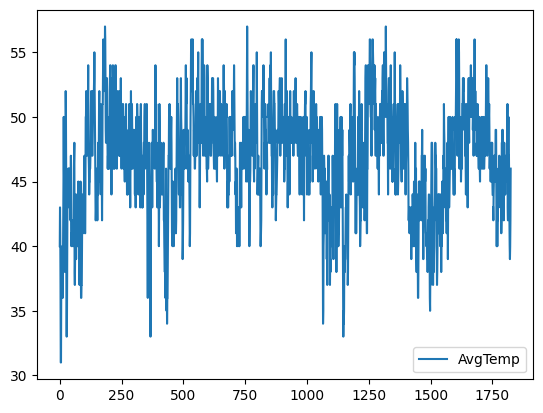

In [36]:
df[["DATE","AvgTemp"]].plot()

In [37]:
df["AvgTemp"].fillna(df["AvgTemp"].mean(),inplace=True)

C:\Users\Kritika\AppData\Local\Temp\ipykernel_10400\2938133691.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [38]:
df = df[["DATE","AvgTemp"]]

In [39]:
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [40]:
df.columns = ["ds","y"]

In [41]:
df.head(2)

,ds,y
0,1/1/2014,40.0
1,1/2/2014,43.0


In [42]:
df["ds"] = pd.to_datetime(df["ds"])

In [43]:
df.head(3)

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0


<Axes: xlabel='ds'>

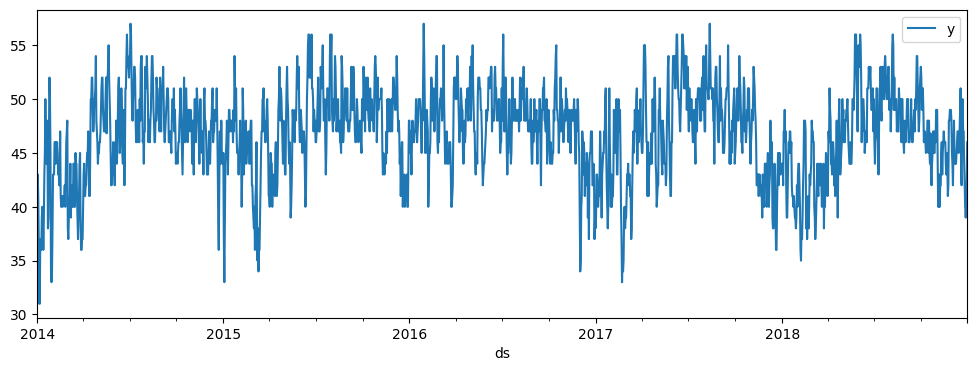

In [44]:
df.plot(x = "ds", y = "y", figsize = (12,4))

In [45]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [46]:
train.shape, test.shape

((1460, 2), (365, 2))

In [47]:
model = Prophet()

In [48]:
model.fit(train)

12:16:17 - cmdstanpy - INFO - Chain [1] start processing
12:16:17 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model.make_future_dataframe(periods= 365)

In [50]:
future

,ds
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
1820,2018-12-26
1821,2018-12-27
1822,2018-12-28
1823,2018-12-29


In [51]:
forecast = model.predict(future)

In [52]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2018-12-26,46.268723,36.653925,45.719194,44.754916,47.839257,-4.887708,-4.887708,-4.887708,-0.059834,-0.059834,-0.059834,-4.827874,-4.827874,-4.827874,0.0,0.0,0.0,41.381015
1821,2018-12-27,46.268103,36.974947,46.056845,44.744645,47.847033,-4.747623,-4.747623,-4.747623,0.097827,0.097827,0.097827,-4.845449,-4.845449,-4.845449,0.0,0.0,0.0,41.520480
1822,2018-12-28,46.267483,37.506775,46.340319,44.734373,47.852599,-4.408644,-4.408644,-4.408644,0.425980,0.425980,0.425980,-4.834623,-4.834623,-4.834623,0.0,0.0,0.0,41.858839
1823,2018-12-29,46.266863,36.756100,46.347686,44.724924,47.856448,-4.788772,-4.788772,-4.788772,0.006752,0.006752,0.006752,-4.795524,-4.795524,-4.795524,0.0,0.0,0.0,41.478091
1824,2018-12-30,46.266242,36.623835,45.913000,44.716218,47.860296,-4.969109,-4.969109,-4.969109,-0.240352,-0.240352,-0.240352,-4.728758,-4.728758,-4.728758,0.0,0.0,0.0,41.297133


In [53]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,39.254749,34.886922,43.335758
1,2014-01-02,39.574747,35.587067,43.645003
2,2014-01-03,40.085611,35.894522,44.447981
3,2014-01-04,39.866874,35.524640,44.139698
4,2014-01-05,39.835220,35.842878,44.399892
...,...,...,...,...
1820,2018-12-26,41.381015,36.653925,45.719194
1821,2018-12-27,41.520480,36.974947,46.056845
1822,2018-12-28,41.858839,37.506775,46.340319
1823,2018-12-29,41.478091,36.756100,46.347686


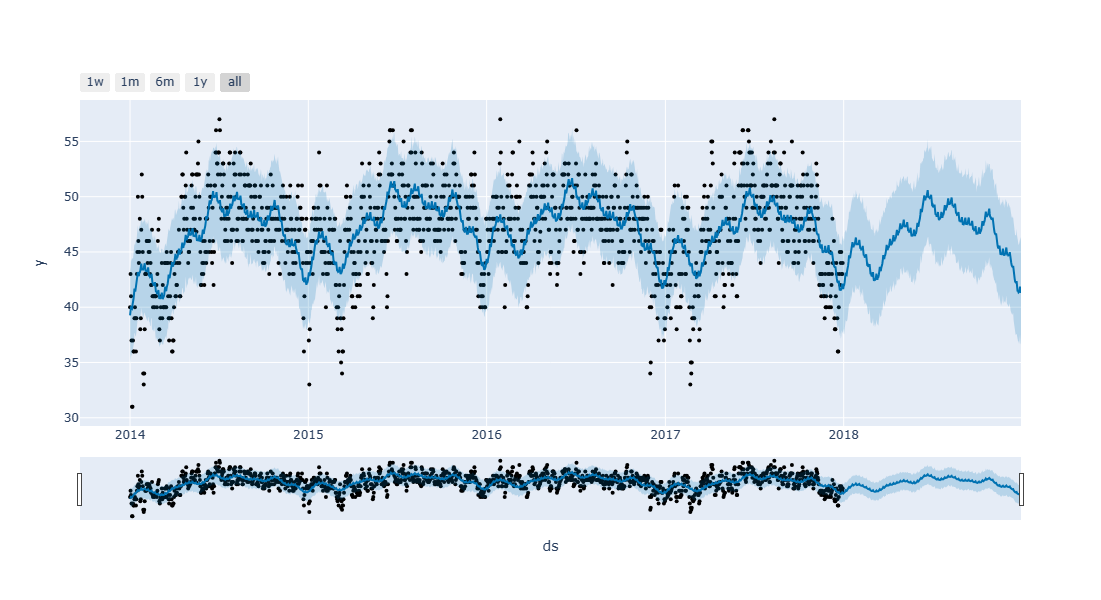

In [54]:
plot_plotly(model,forecast)

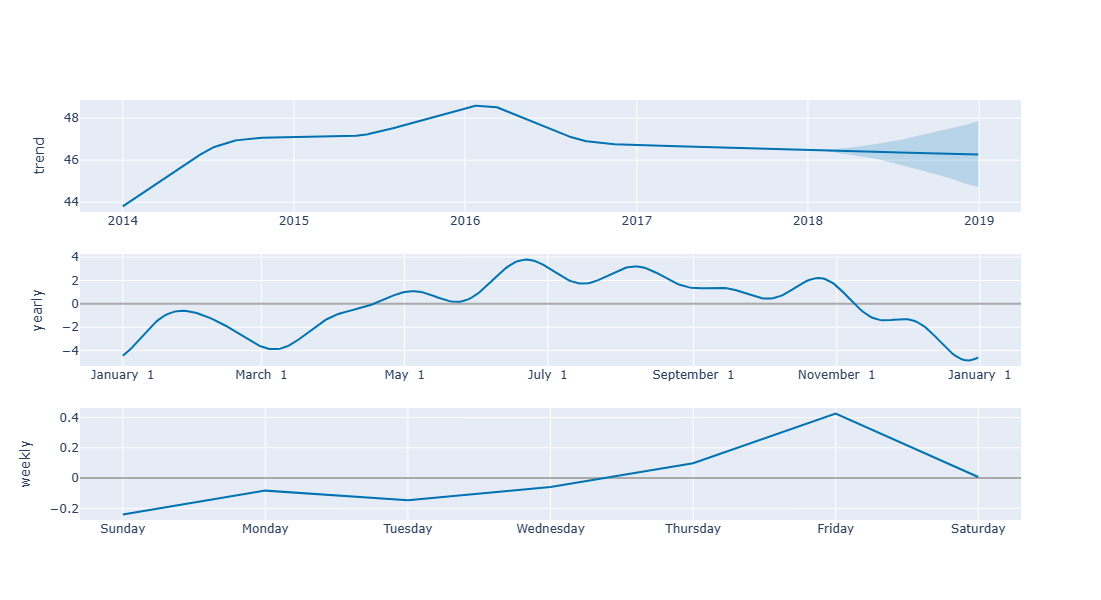

In [55]:
plot_components_plotly(model,forecast)

In [56]:
from statsmodels.tools.eval_measures import rmse

In [57]:
pred = forecast.iloc[-365:]["yhat"]

In [58]:
pred.head()

1460    41.643579
1461    41.924529
1462    42.007196
1463    42.261397
1464    42.603750
Name: yhat, dtype: float64

In [59]:
rmse(pred, test["y"])

3.458617763904657

In [60]:
test["y"].mean()

46.31183227640992